The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. 

The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to predict the wine quality using maching learning models

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
path = './winequality-red.csv'
#Loading dataset
wine = pd.read_csv(path)

## Exploratory Data Analysis

In this section we will be doing some exploratory data analysis to have a better understanding of the data we are working with

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


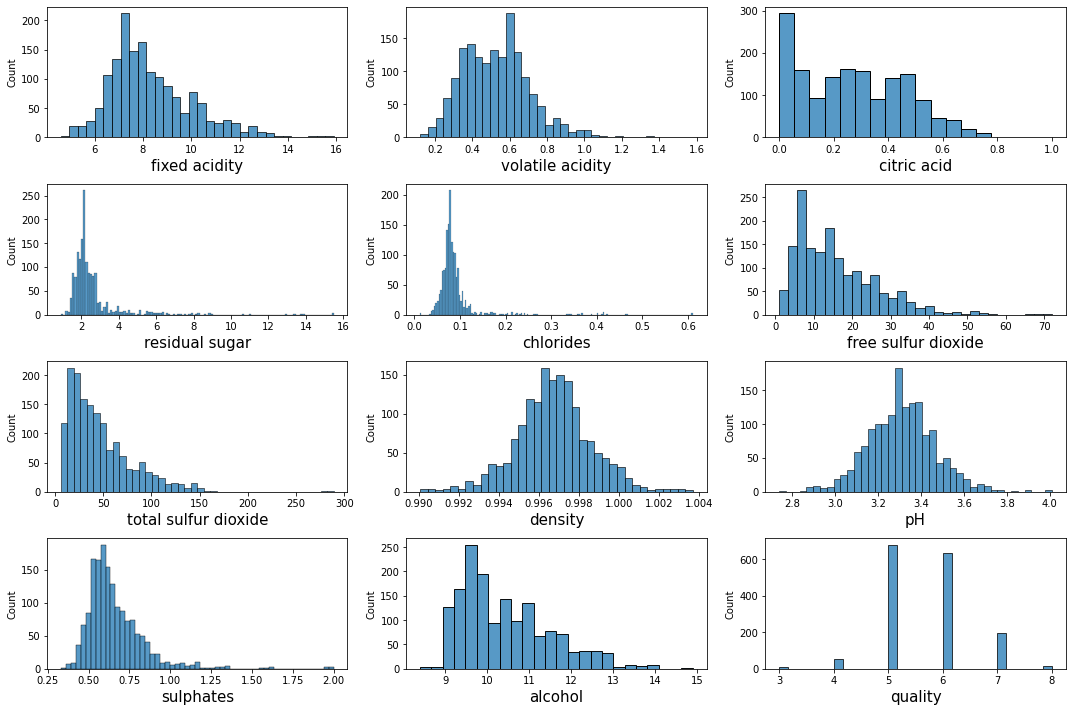

In [4]:
# let's see how data is distributed for every column

plt.figure(figsize = (15, 10))
plotnumber = 1

for col in wine:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(wine[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

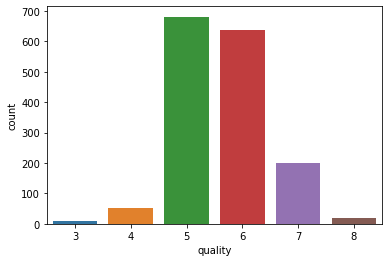

In [5]:
# count of the target variable
sns.countplot(x='quality', data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

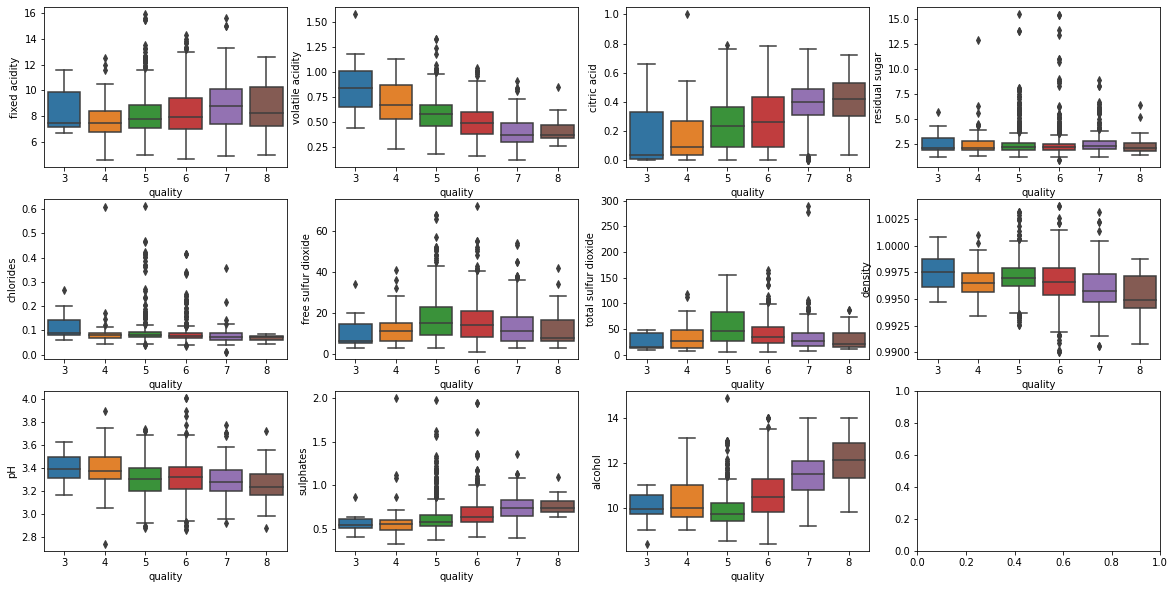

In [6]:
# Plot a boxplot to check for Outliers
# Target variable is Quality. So will plot a boxplot each column against target variable
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
sns.boxplot(x='quality', y='fixed acidity', data=wine, ax=axs[0, 0])
sns.boxplot(x='quality', y='volatile acidity', data=wine, ax=axs[0, 1])
sns.boxplot(x='quality', y='citric acid', data=wine, ax=axs[0, 2])
sns.boxplot(x='quality', y='residual sugar', data=wine, ax=axs[0, 3])
sns.boxplot(x='quality', y='chlorides', data=wine, ax=axs[1, 0])
sns.boxplot(x='quality', y='free sulfur dioxide', data=wine, ax=axs[1, 1])
sns.boxplot(x='quality', y='total sulfur dioxide', data=wine, ax=axs[1, 2])
sns.boxplot(x='quality', y='density', data=wine, ax=axs[1, 3])
sns.boxplot(x='quality', y='pH', data=wine, ax=axs[2, 0])
sns.boxplot(x='quality', y='sulphates', data=wine, ax=axs[2, 1])
sns.boxplot(x='quality', y='alcohol', data=wine, ax=axs[2, 2])

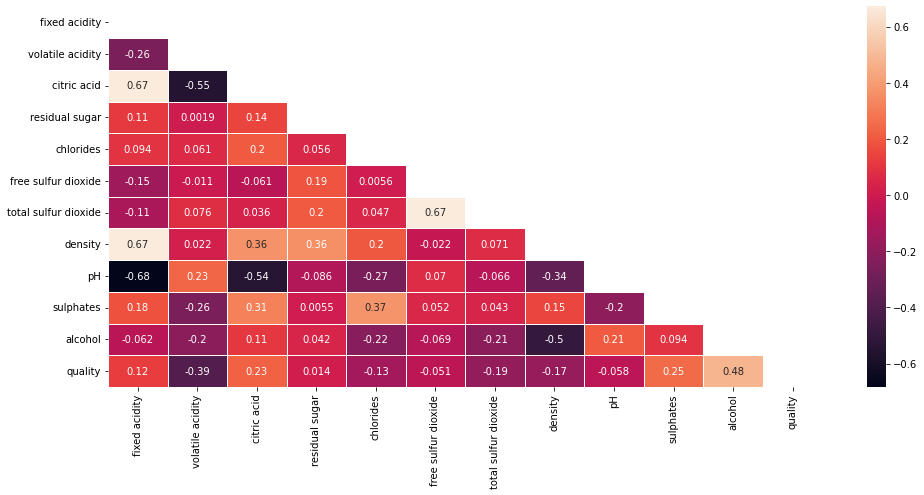

In [7]:
# heatmap

plt.figure(figsize = (16, 7))

corr = wine.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

## Data Preprocessing

### check for missing values

<AxesSubplot:>

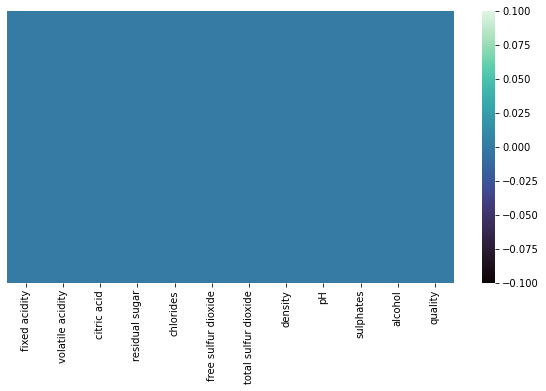

In [8]:
# plot the heatmap to see where the missing values
plt.figure(figsize=(10,5))
sns.heatmap(wine.isnull(),yticklabels=False,cbar=True,cmap='mako')

good data quality! no missing values

### Remove outliers

There are different ways to treat outliers such as remove outliers from the dataset, KNN imputation, etc. However, I'm not a domain expert therefore in this scenario, I will remove outliers from the dataset.

In [9]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
wine = wine[~((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

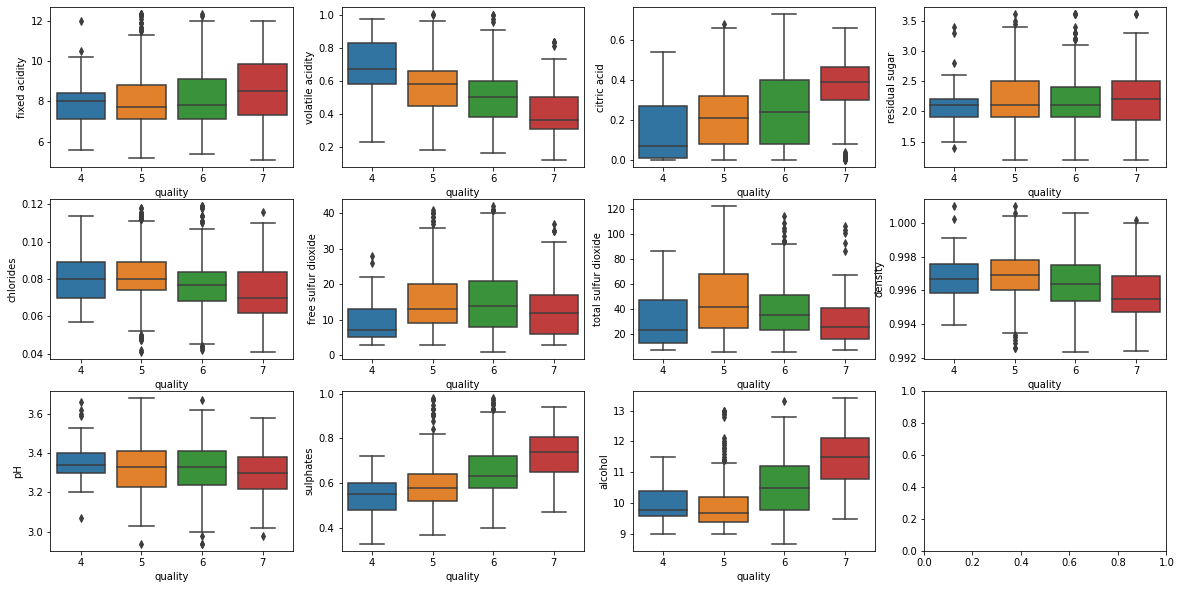

In [10]:
#lets see how our data looks like after removing outliers
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
sns.boxplot(x='quality', y='fixed acidity', data=wine, ax=axs[0, 0])
sns.boxplot(x='quality', y='volatile acidity', data=wine, ax=axs[0, 1])
sns.boxplot(x='quality', y='citric acid', data=wine, ax=axs[0, 2])
sns.boxplot(x='quality', y='residual sugar', data=wine, ax=axs[0, 3])
sns.boxplot(x='quality', y='chlorides', data=wine, ax=axs[1, 0])
sns.boxplot(x='quality', y='free sulfur dioxide', data=wine, ax=axs[1, 1])
sns.boxplot(x='quality', y='total sulfur dioxide', data=wine, ax=axs[1, 2])
sns.boxplot(x='quality', y='density', data=wine, ax=axs[1, 3])
sns.boxplot(x='quality', y='pH', data=wine, ax=axs[2, 0])
sns.boxplot(x='quality', y='sulphates', data=wine, ax=axs[2, 1])
sns.boxplot(x='quality', y='alcohol', data=wine, ax=axs[2, 2])

### Dividing wine as good and bad

/home/chengbo/miniconda3/envs/jupyterlab-nb2slide/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

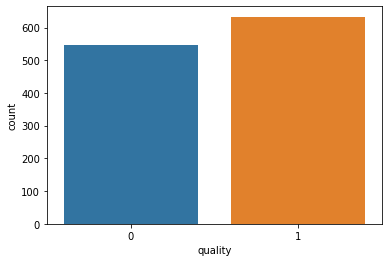

In [11]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
sns.countplot(wine['quality'])

## Feature Engineering

### Create new features

In [12]:
# combine fixed and volatile acidity to create total acidity
def sumup_acidity (row):
   return row['fixed acidity'] + row['volatile acidity']

wine['total acidity'] = wine.apply(lambda row: sumup_acidity(row), axis=1)
# note the new variables at the end of the dataframe
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10


### Remove some features

In [13]:
# there is almost no correletion beteween ph, residual sugar and the wine quality
wine.drop('pH', inplace=True, axis=1)
wine.drop('residual sugar', inplace=True, axis=1)

## Setup Models

In [14]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier(penalty=None)
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
# Support Vector Classifier
svc = SVC()

### Cross Validataion Score of each model

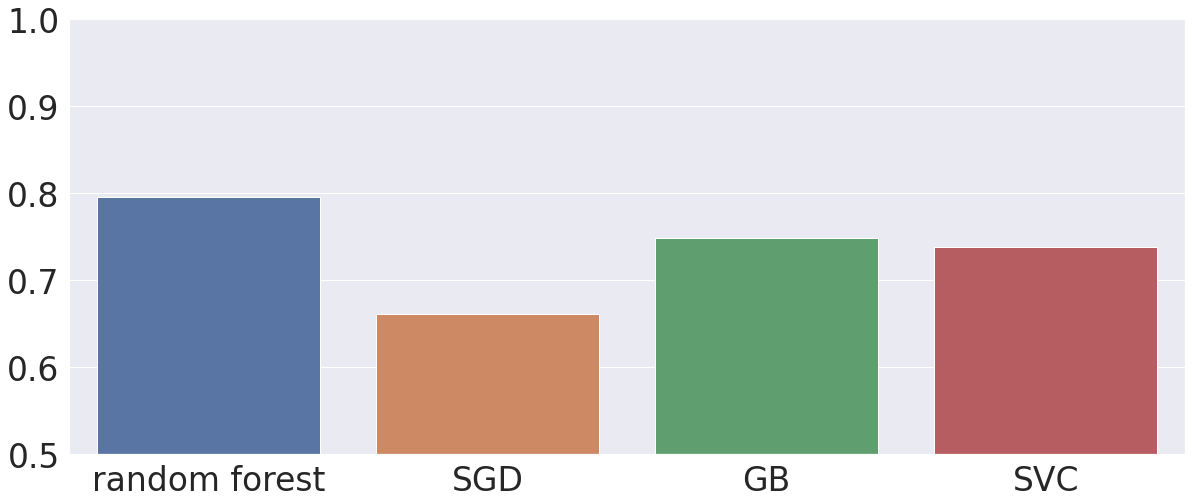

In [22]:
# compute the cross validation score of models
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
gb_eval = cross_val_score(estimator = gb, X = X_train, y = y_train, cv = 10)
svc_eval = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)

models = {
    'Model': ['random forest', 'SGD', 'GB', 'SVC'],
    'Acc': [rfc_eval.mean(), sgd_eval.mean(), gb_eval.mean(), svc_eval.mean()]
}
plt.figure(figsize = (20, 8))
sns.set(font_scale=3)
sns.barplot(x = 'Model', y = 'Acc', data = models)
plt.ylim(0.5, 1)
plt.show()

Random forest looks best

## Model Performance on Testing Set

In [23]:
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print("Acc : ", acc)

Acc :  0.8008474576271186


In [24]:
# let's use weighted F1 metric to evaluate the model
from sklearn.metrics import fbeta_score
score = fbeta_score(y_test, y_pred_rf,beta=0.5)

print("F1 : ", score)

F1 :  0.8132045088566829


<AxesSubplot:>

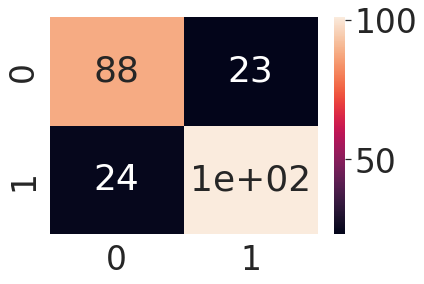

In [25]:
# Also check the confusion matrix of the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True)